<a href="https://colab.research.google.com/github/Gregory-Eales/RL-TicTacToe/blob/master/RL_TicTacToe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Dependencies

In [1]:
!pip3 install dropbox

In [2]:
import numpy as np
import keras
import dropbox
import random
from tqdm import tqdm
from keras.layers import Convolution2D as Conv2D
from keras.layers import Dense
from keras.layers import Flatten
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
%matplotlib inline

Defining Training Enviroment

In [0]:
class TrainENV(object):
  
  def __init__(self, num_models=2):
    self.num_models = num_models
    self.board = np.zeros([3, 3])
    self.dbx_token = "qCE45upb8QAAAAAAAAAAEkIQWUdP5SqMqWG9I5C_3DDAN_Vlleeyjvc5Sv4vyWp9"
    self.dbx = dropbox.Dropbox(self.dbx_token)
    self.initialize_models()
    self.build_model_architecture()
    
  ###############################
  # DEEP NEURAL NETWORK METHODS #
  ###############################
  
  # defines and stores models in model dict
  def initialize_models(self):
    self.model = {}
    for i in range(self.num_models):
      self.model["M" + str(i+1)] = keras.models.Sequential()
    
    
  # builds initialized model with defined architecture
  def build_model_architecture(self):
    for i in range(self.num_models):
      self.model["M" + str(i+1)].add(Conv2D(30, kernel_size=2, activation='relu', padding="same", input_shape=(3,3,1)))
      self.model["M" + str(i+1)].add(Conv2D(15, kernel_size=2, padding="same", activation='relu'))
      self.model["M" + str(i+1)].add(Flatten())
      self.model["M" + str(i+1)].add(Dense(15, activation='relu'))
      self.model["M" + str(i+1)].add(Dense(9, activation='sigmoid'))
      self.model['M' + str(i+1)].compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
    
  
  # saves models in project folder
  def save_models(self):
    for i in range(self.num_models):
     # self.model["M"+str(i+1)].
     pass
  
  # loads models from project folder
  def load_models(self):
    pass
  
  ###########################
  # GAME ENVIROMENT METHODS #
  ###########################
  
  # runs the main game loop
  def play_human(self, model="M1"):
    self.board = np.zeros([3, 3])
    turn = random.choice(["human", "ai"])
    if turn == "ai":
      model = model
    else:
      model = model
    playing = True
    self.print_board()
    while playing:
      
      if turn == "ai":
      # make ai move
        self.make_ai_move(model=model)
        turn = "human"
        
      else:
        # make rand move
        self.make_human_move()
        turn = "ai"
          
      winner_state = self.check_winner()
        
      if winner_state == None and self.check_draw():
        playing = False
        print("Game was a draw!")
        
      if winner_state != None:
        playing = False
        
      self.print_board()
    
    if winner_state == 1:
      print("AI won the match!")
      
    if winner_state == -1:
      print("Human won the match!")
  
  def rand_train_ai(self, model="M1", epochs=100):
    
    hist_win_rate = []
    number_games = 0
    ai_wins = 0
    
    for i in tqdm(range(epochs)):
      number_games += 1
      self.board = np.zeros([3, 3])
      playing = True
      turn = random.choice(["ai", "rand"])
      big_x = []
      big_y = []
      ai_x = []
      ai_y = []
      rand_x = []
      rand_y = []
      
      while playing:
        
        if turn == "ai":
          # make ai move
          ai_y.append(self.board)
          ai_x.append(self.make_ai_move())
          turn = "rand"
        
        elif turn == "rand":
          # make rand move
          rand_y.append(self.board/-1)
          rand_x.append(self.make_rand_move()/-1)
          turn = "ai"
          
        winner_state = self.check_winner()
        
        if winner_state == None and self.check_draw():
          playing = False
        
        if winner_state != None:
          playing = False
        
      if winner_state == 1:
        ai_wins += 1
        length = len(ai_x)
        big_x = big_x + rand_x
        big_y = big_y + rand_y
        ai_x = np.array(ai_x).reshape(length, 3, 3, 1)
        ai_y = np.array(ai_y).reshape(length, 9)
        self.model[model].fit(ai_x, ai_y, verbose=0, epochs=10)
          
      if winner_state == -1:
        length = len(rand_x)
        big_x = big_x + rand_x
        big_y = big_y + rand_y
        rand_x = np.array(rand_x).reshape(length, 3, 3, 1)
        rand_y = np.array(rand_y).reshape(length, 9)
        self.model[model].fit(rand_x, rand_y, verbose=0, epochs=10)
        
      hist_win_rate.append(ai_wins/number_games)
    plt.plot(hist_win_rate)
    plt.show()
    
    length = len(big_x)
    big_x = np.array(big_x).reshape(length, 3, 3, 1)
    big_y = np.array(big_y).reshape(length, 9)
    self.model[model].fit(big_x, big_y, epochs = 1000)
    
    
  def rand_play_ai(self, model="M1", epochs=100):
    
    hist_win_rate = []
    number_games = 0
    ai_wins = 0
    
    for i in tqdm(range(epochs)):
      number_games += 1
      self.board = np.zeros([3, 3])
      playing = True
      turn = random.choice(["ai", "rand"])
      
      if turn == "ai":
        model = "M1"
      else:
        model = "M2"
      
      while playing:
        
        if turn == "ai":
          # make ai move
          self.make_ai_move()
          turn = "rand"
        
        elif turn == "rand":
          # make rand move
          self.make_rand_move()
          turn = "ai"
          
        winner_state = self.check_winner()
        
        if winner_state == None and self.check_draw():
          playing = False
        
        if winner_state != None:
          playing = False
        
      if winner_state == 1:
        ai_wins += 1
        
          
      if winner_state == -1:
        pass
        
      hist_win_rate.append(ai_wins/number_games)
    plt.plot(hist_win_rate)
    plt.show()
    
    
  
  def ai_train_ai(self, model1="M1", model2 = "M2", epochs=100):
    
    hist_M1 = []
    hist_M2 = []
    hist_draw = []
    number_games = 0
    M1_wins = 0
    M2_wins = 0
    draws = 0
    
    for i in tqdm(range(epochs)):
      number_games += 1
      self.board = np.zeros([3, 3])
      playing = True
      turn = random.choice(["M1", "M2"])
      big_x = []
      big_y = []
      ai_x = []
      ai_y = []
      rand_x = []
      rand_y = []
      
      while playing:
        
        if turn == "M1":
          # make ai move
          ai_y.append(self.board)
          ai_x.append(self.make_ai_move(model=model1))
          turn = "M2"
        
        elif turn == "M2":
          # make rand move
          rand_y.append(self.board/-1)
          rand_x.append(self.make_ai_move(model=model2, state_type = -1)/-1)
          turn = "M1"
          
        winner_state = self.check_winner()
        
        if winner_state == None and self.check_draw():
          draws += 1
          playing = False
        
        if winner_state != None:
          playing = False
        
      if winner_state == 1:
        M1_wins += 1
        length = len(ai_x)
        #big_x = big_x + rand_x
        #big_y = big_y + rand_y
        ai_x = np.array(ai_x).reshape(length, 3, 3, 1)
        ai_y = np.array(ai_y).reshape(length, 9)
        to_learn = random.choice([model1, model2])
        self.model[to_learn].fit(ai_x, ai_y, verbose=0, epochs=1)
        
          
      if winner_state == -1:
        M2_wins +=1
        length = len(rand_x)
        #big_x = big_x + rand_x
        #big_y = big_y + rand_y
        rand_x = np.array(rand_x).reshape(length, 3, 3, 1)
        rand_y = np.array(rand_y).reshape(length, 9)
        to_learn = random.choice([model1, model2])
        self.model[to_learn].fit(rand_x, rand_y, verbose=0, epochs=1)
        
      hist_M1.append(M1_wins/number_games)
      hist_M2.append(M2_wins/number_games)
      hist_draw.append(draws/number_games)
      
    plt.plot(hist_M1, label="Model1 Wins")
    plt.plot(hist_M2, label="Model2 Wins")
    plt.plot(hist_draw, label="Draws")
    plt.legend()
    plt.show(hist_draw)
    
    #length = len(big_x)
    #big_x = np.array(big_x).reshape(length, 3, 3, 1)
    #big_y = np.array(big_y).reshape(length, 9)
    #self.model[model1].fit(big_x, big_y, epochs = 1000)
        
  def make_ai_move(self, model="M1", state_type=1):
    if state_type == 1:
      move = self.model[model].predict(self.board.reshape(1, 3, 3, 1)).reshape(3, 3)
    if state_type == -1:
      move = self.model[model].predict(self.board.reshape(1, 3, 3, 1)/-1).reshape(3, 3)
    picking = True
    while picking:
      maximum = move.max()
      pred_truth = move == maximum
      pred_truth = pred_truth
      activation_loc = [0, 0]
      for j in range(3):
        for i in range(3):
          if pred_truth[j][i] == 1:
            activation_loc = [i, j]
            if self.board[j][i] == 0:
              self.board[j][i] = state_type
              picking = False
              return move
            else:
              move[activation_loc[1]][activation_loc[0]] = 0
    
  
  
  def make_rand_move(self):
    move = np.zeros([3, 3])
    moves = []
    for i in range(3):
      for j in range(3):
        if self.board[j][i] == 0:
          moves.append([j, i])
    
    if moves != []:
      
      choice = random.choice(moves)
    
      self.board[choice[0]][choice[1]] = -1
  
      move[choice[0]][choice[1]] = -1
    
      return move
    
    else:
      #print(self.board)
      pass
      
  # checks for a draw
  def check_draw(self):
    
    for i in range(3):
      for j in range(3):
        if self.board[i][j] == 0:
          return False
    return True
  
  
  # checks to see if move is valid
  def check_move(self):
    pass
  
  # gets human move
  def make_human_move(self):
    making_move = True
    while making_move:
      y = input("move y-dimension: ")
      x = input("move y-dimension: ")
      if self.board[int(y)][int(x)] == 0:
            making_move = False
      else:
            print("Invalid Move, Try Again")
      
    self.board[int(y)][int(x)] = -1
  
  # check to see if there is a winner
  def check_winner(self):
    
    # check horizontal
    for i in range(3):
      
      if self.board[i][0] == self.board[i][1] and self.board[i][1] == self.board[i][2]:
        if self.board[i][0] != 0:
          return self.board[i][0]
        
      if self.board[0][i] == self.board[1][i] and self.board[1][i] == self.board[2][i]:
        if self.board[0][i] != 0:
          return self.board[0][i]
      
    if self.board[0][0] == self.board[1][1] and self.board[1][1] == self.board[2][2]:
      if self.board[0][0] != 0: 
        return self.board[0][0]
    
    if self.board[0][2] == self.board[1][1] and self.board[1][1] == self.board[2][0]:
      if self.board[1][1] != 0:
        return self.board[1][1]
    
    
    return None
   
      
  
  # prints board state
  def print_board(self):
    board = []
    
    for i in range(3):
      row = []
      for j in range(3):
        
        if self.board[i][j] == 0:
          row.append(" ")
          
        elif self.board[i][j] == 1:
          row.append("X")
        
        elif self.board[i][j] == -1:
          row.append("O")
        
      board.append(row)
    
    print("-------------")
    print("|", board[0][0], "|", board[0][1], "|", board[0][2], "|")
    print("-------------")
    print("|", board[1][0], "|", board[1][1], "|", board[1][2], "|")
    print("-------------")
    print("|", board[2][0], "|", board[2][1], "|", board[2][2], "|")
    print("-------------")
    
  
  
  ####################
  # DROP BOX METHODS #
  ####################
  
  # returns the current dropbox account
  def get_dbx_account(self):
    return(self.dbx.users_get_current_account())
  
  # uploads project file
  def upload_file_dbx(self):
    dbx.files_upload("RL-TicTacToe", '/RL-TicTacToe/')
  
  # downloads project file
  def download_file_dbx(self):
    pass

Testing ENV Elements

100%|██████████| 1000/1000 [00:15<00:00, 66.49it/s]


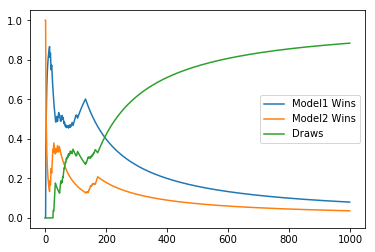

In [64]:
env = TrainENV(num_models = 4)
env.ai_train_ai(epochs = 1000)

100%|██████████| 1000/1000 [00:13<00:00, 75.53it/s]


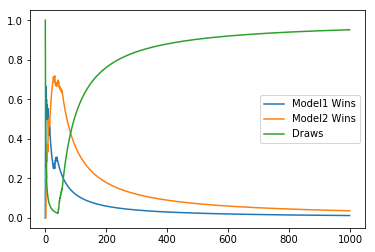

In [66]:
env.ai_train_ai(epochs = 1000, model1="M1", model2="M3")

100%|██████████| 1000/1000 [00:04<00:00, 223.88it/s]


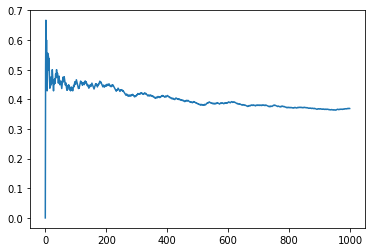

In [67]:
env.rand_play_ai(epochs=1000)

In [63]:
env.play_human()

-------------
|   |   |   |
-------------
|   |   |   |
-------------
|   |   |   |
-------------
-------------
|   |   |   |
-------------
|   |   |   |
-------------
|   | X |   |
-------------
move y-dimension: 0
move y-dimension: 0
-------------
| O |   |   |
-------------
|   |   |   |
-------------
|   | X |   |
-------------
-------------
| O |   |   |
-------------
|   | X |   |
-------------
|   | X |   |
-------------
move y-dimension: 0
move y-dimension: 1
-------------
| O | O |   |
-------------
|   | X |   |
-------------
|   | X |   |
-------------
-------------
| O | O |   |
-------------
| X | X |   |
-------------
|   | X |   |
-------------
move y-dimension: 0
move y-dimension: 2
-------------
| O | O | O |
-------------
| X | X |   |
-------------
|   | X |   |
-------------
Human won the match!
